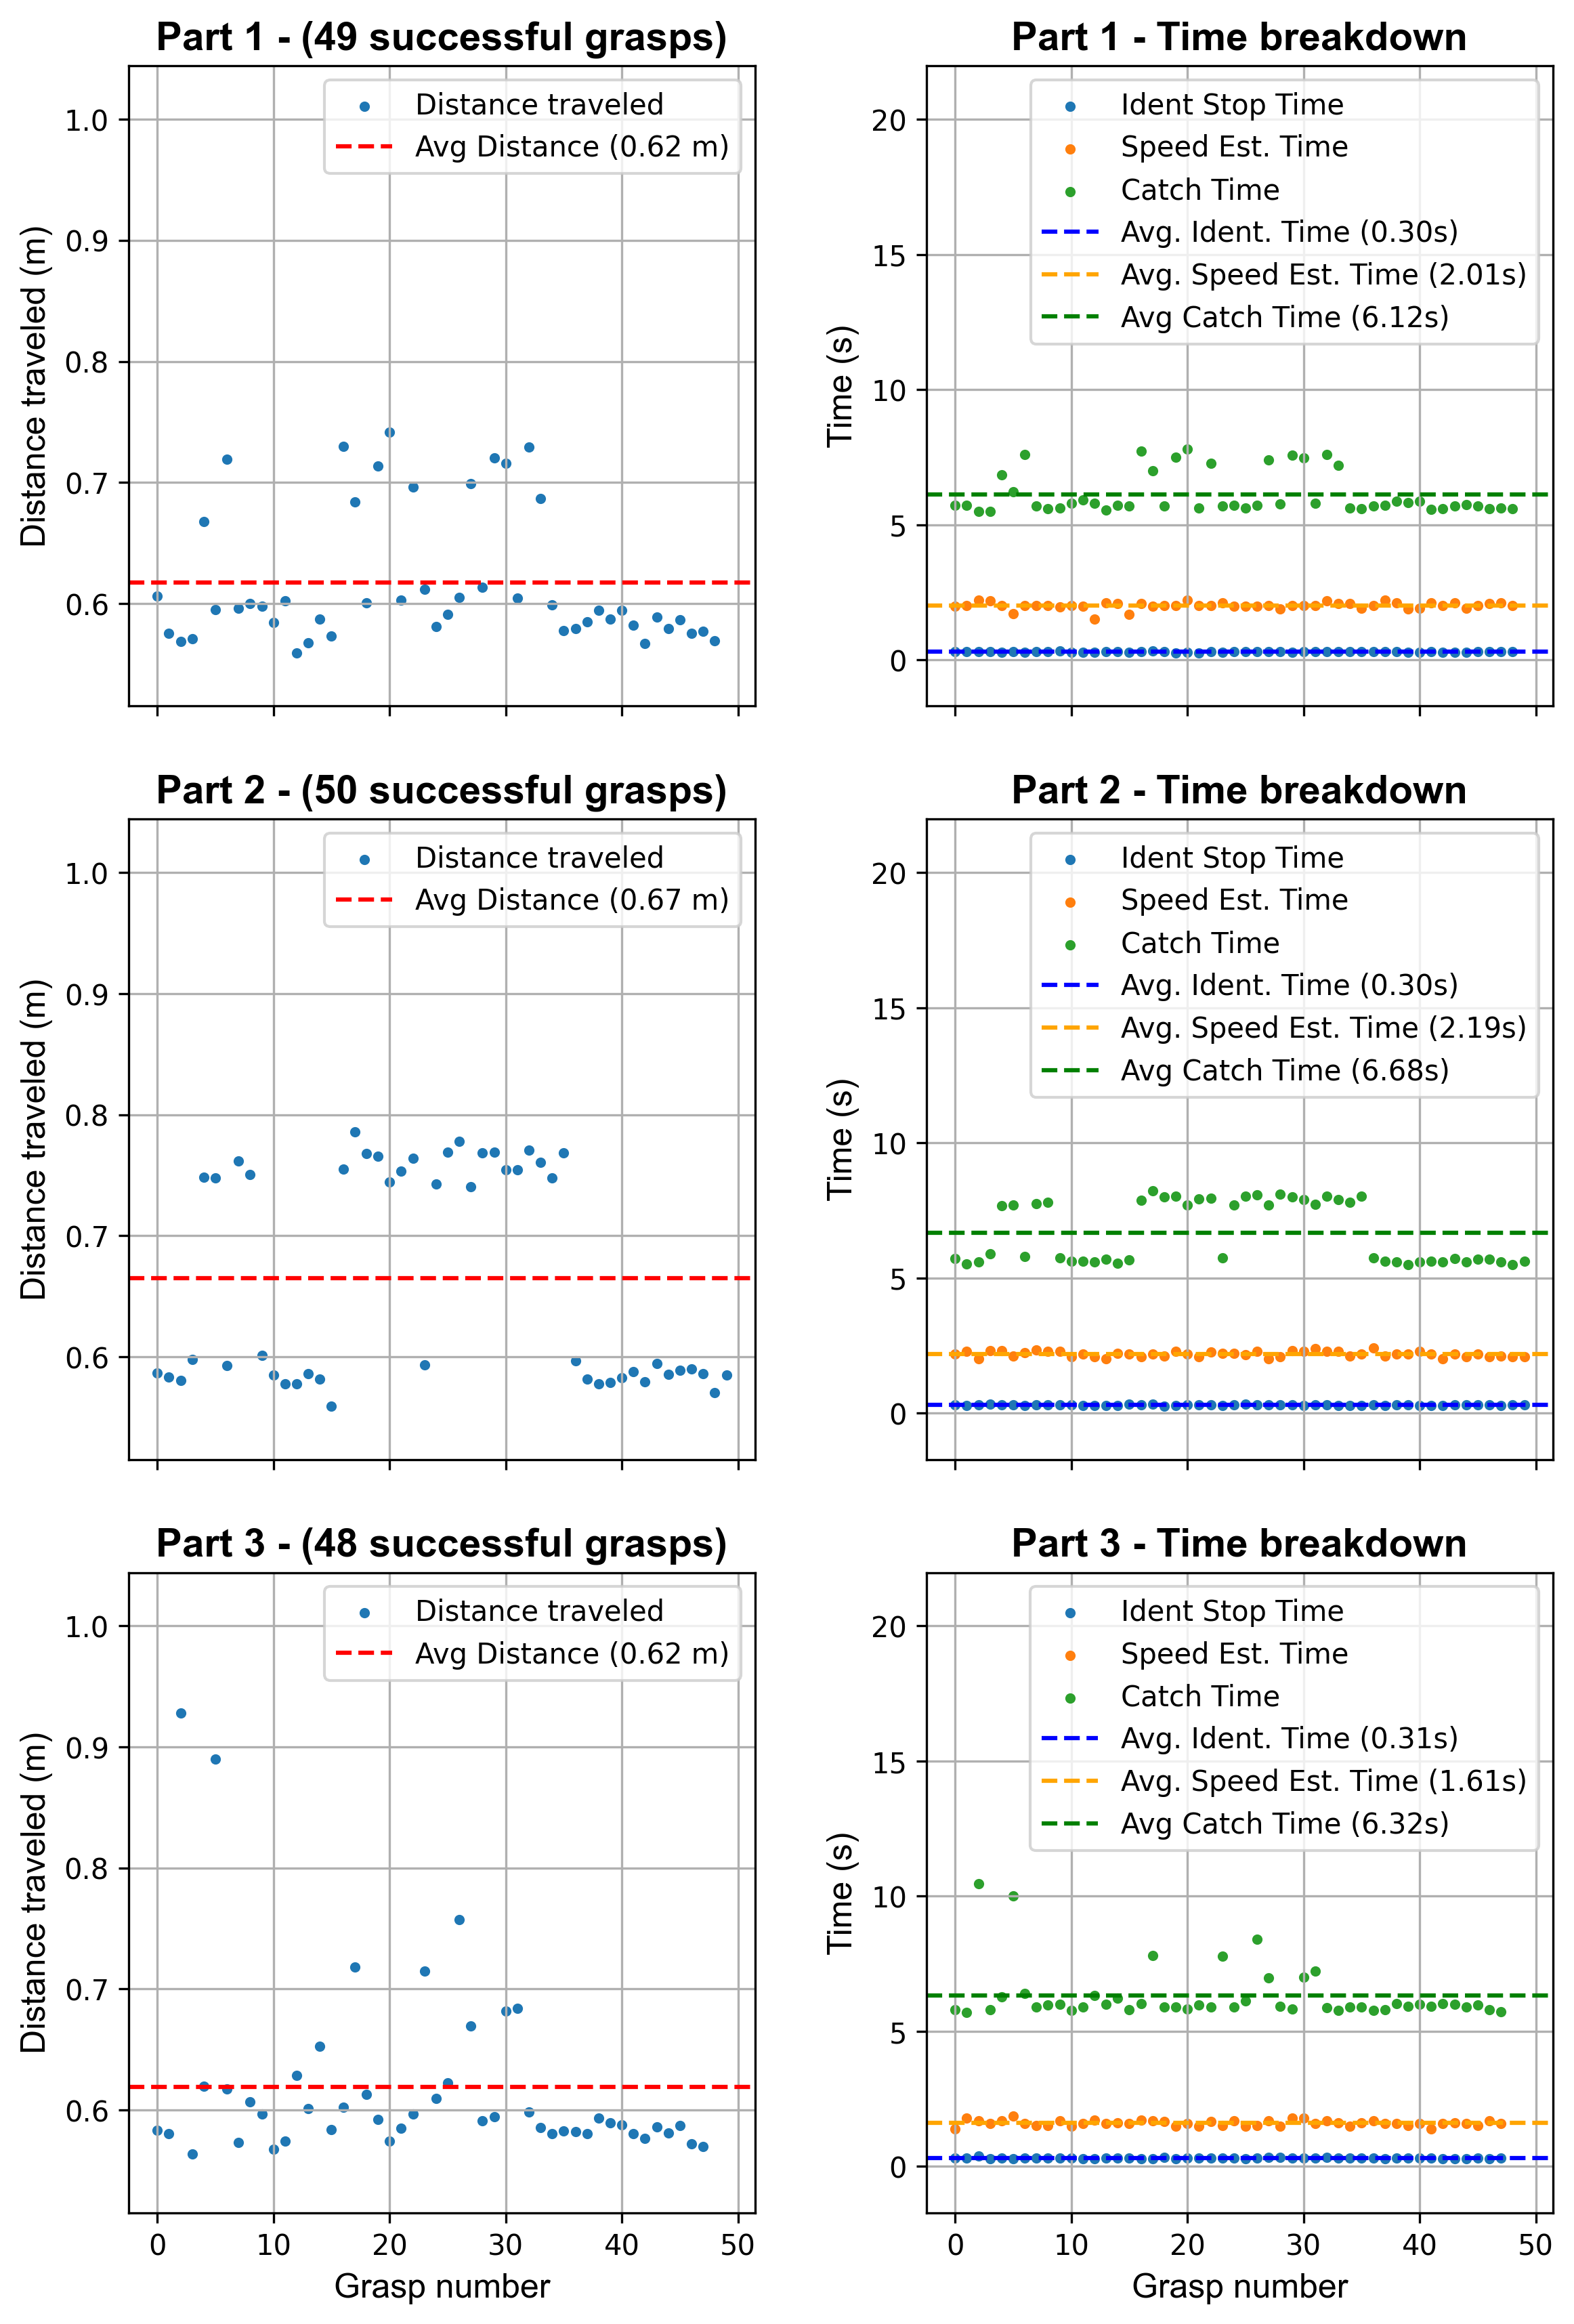

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def add_margin(ymin, ymax, margin=0.1):
    y_range = ymax - ymin
    if y_range == 0:
        margin_abs = 1 if ymin == 0 else abs(ymin) * margin
        return ymin - margin_abs, ymax + margin_abs
    margin_abs = y_range * margin
    return ymin - margin_abs, ymax + margin_abs

# Font sizes for thesis (in points)
title_fontsize = 14
label_fontsize = 12
tick_fontsize = 10
legend_fontsize = 10

# Marker sizes for scatter plots
distance_markersize = 7  # size of dots for distance plot
time_markersize = 7      # size of dots for time plot

# Load CSV
df = pd.read_csv("plots_for_thesis/20Hz_times.csv")

parts = [0, 1, 2]  # now 3 parts
fig, axes = plt.subplots(3, 2, figsize=(8.27, 11.69), dpi=300, sharex='col')  # A4 portrait size

plt.tight_layout(pad=3.0)

# Calculate y-limits for distance and time across parts
distance_min, distance_max = np.inf, -np.inf
time_min, time_max = np.inf, -np.inf

for part_id in parts:
    part_df = df[df["part_number"] == part_id]
    if not part_df.empty:
        distance_min = min(distance_min, part_df["distance_traveled"].min())
        distance_max = max(distance_max, part_df["distance_traveled"].max())
        ident_stop = part_df["time_ident_stop"]
        est_time = part_df["time_speed_est_stop"] - part_df["time_speed_est_start"]
        catch_time = part_df["time_catch_stop"] - part_df["time_catch_start"]
        time_min = min(time_min, ident_stop.min(), est_time.min(), catch_time.min())
        time_max = max(time_max, ident_stop.max(), est_time.max(), catch_time.max())

distance_min, distance_max = add_margin(distance_min, 1.0, 0.1)
time_min, time_max = add_margin(time_min, 20, 0.1)

for row, part_id in enumerate(parts):
    part_df = df[df["part_number"] == part_id].reset_index(drop=True)
    n_points = len(part_df)
    avg_distance = part_df["distance_traveled"].mean()

    # Distance subplot (left column)
    ax_dist = axes[row, 0]
    ax_dist.scatter(part_df.index, part_df["distance_traveled"], s=distance_markersize, label="Distance traveled")
    ax_dist.axhline(avg_distance, color='r', linestyle='--', label=f"Avg Distance ({avg_distance:.2f} m)")
    ax_dist.set_title(f"Part {part_id + 1} - ({n_points} successful grasps)",
                      fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    ax_dist.set_ylabel("Distance traveled (m)", fontsize=label_fontsize, fontname='Arial')
    ax_dist.grid(True)
    ax_dist.set_ylim(distance_min, distance_max)
    ax_dist.legend(fontsize=legend_fontsize, loc='upper right')
    ax_dist.tick_params(axis='both', which='major', labelsize=tick_fontsize)

    # Time subplot (right column)
    ax_time = axes[row, 1]
    ident_stop = part_df["time_ident_stop"]
    est_time = part_df["time_speed_est_stop"] - part_df["time_speed_est_start"]
    catch_time = part_df["time_catch_stop"] - part_df["time_catch_start"]

    ax_time.scatter(part_df.index, ident_stop, s=time_markersize, label="Ident Stop Time")
    ax_time.scatter(part_df.index, est_time, s=time_markersize, label="Speed Est. Time")
    ax_time.scatter(part_df.index, catch_time, s=time_markersize, label="Catch Time")

    avg_ident_stop = ident_stop.mean()
    avg_est_time = est_time.mean()
    avg_catch_time = catch_time.mean()

    ax_time.axhline(avg_ident_stop, color='blue', linestyle='--', label=f"Avg. Ident. Time ({avg_ident_stop:.2f}s)")
    ax_time.axhline(avg_est_time, color='orange', linestyle='--', label=f"Avg. Speed Est. Time ({avg_est_time:.2f}s)")
    ax_time.axhline(avg_catch_time, color='green', linestyle='--', label=f"Avg Catch Time ({avg_catch_time:.2f}s)")

    ax_time.set_title(f"Part {part_id + 1} - Time breakdown",
                      fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    ax_time.set_xlabel("", fontsize=label_fontsize, fontname='Arial')
    ax_time.set_ylabel("Time (s)", fontsize=label_fontsize, fontname='Arial')
    ax_time.grid(True)
    ax_time.set_ylim(time_min, time_max)
    ax_time.legend(fontsize=legend_fontsize)
    ax_time.tick_params(axis='both', which='major', labelsize=tick_fontsize)

axes[2, 0].set_xlabel("Grasp number", fontsize=label_fontsize, fontname='Arial')
axes[2, 1].set_xlabel("Grasp number", fontsize=label_fontsize, fontname='Arial')

plt.show()


In [18]:
fig.savefig("time_plots20.pdf", bbox_inches='tight')